In [43]:
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

from movement.io import load_poses

In [44]:
data_dir = Path.home() / "Data" / "behav-analysis-course" / "mouse-EPM"
behav_deriv_dir = data_dir / "derivatives" / "behav"

# SLEAP predictions
sleap_predictions_dir = behav_deriv_dir / "software-SLEAP_project" / "predictions"
video1_sleap_preds_file = sleap_predictions_dir / "video-1.predictions.analysis.h5"
video2_sleap_preds_file = sleap_predictions_dir / "video-2.predictions.analysis.h5"

# DeepLabCut predictions
dlc_predictions_dir = behav_deriv_dir / "software-DLC_predictions"
video1_dlc_preds_file = dlc_predictions_dir / "sub-01_ses-01_task-EPM_time-165049_video_DLC_resnet50_MouseTopDownSep13shuffle1_340000_filtered.h5"
video2_dlc_preds_file = dlc_predictions_dir / "sub-02_ses-01_task-EPM_time-185651_video_DLC_resnet50_MouseTopDownSep13shuffle1_340000_filtered.h5"

# Frames (used as background for plotting)
video1_frame_file = dlc_predictions_dir / "sub-01_ses-01_task-EPM_time-170049_frame.png"
video2_frame_file = dlc_predictions_dir / "sub-02_ses-01_task-EPM_time-190651_frame.png"

for folder in [behav_deriv_dir, sleap_predictions_dir, dlc_predictions_dir]:
    assert folder.is_dir()

for file in [
    video1_sleap_preds_file,
    video2_sleap_preds_file,
    video1_dlc_preds_file,
    video2_dlc_preds_file,
    video1_frame_file,
    video2_frame_file,
]:
    assert file.is_file()

In [45]:
ds = load_poses.from_dlc_file(video1_dlc_preds_file, fps=30)
ds

<xarray.Dataset>
Dimensions:      (time: 18485, individuals: 1, keypoints: 8, space: 2)
Coordinates:
  * time         (time) float64 0.0 0.03333 0.06667 0.1 ... 616.1 616.1 616.1
  * individuals  (individuals) <U12 'individual_0'
  * keypoints    (keypoints) <U13 'snout' 'left_ear' ... 'tailbase' 'tail_end'
  * space        (space) <U1 'x' 'y'
Data variables:
    pose_tracks  (time, individuals, keypoints, space) float64 508.3 ... 390.2
    confidence   (time, individuals, keypoints) float64 0.0002829 ... 0.9978
Attributes:
    fps:              30.0
    time_unit:        seconds
    source_software:  DeepLabCut
    source_file:      /Users/nsirmpilatze/Data/behav-analysis-course/mouse-EP...

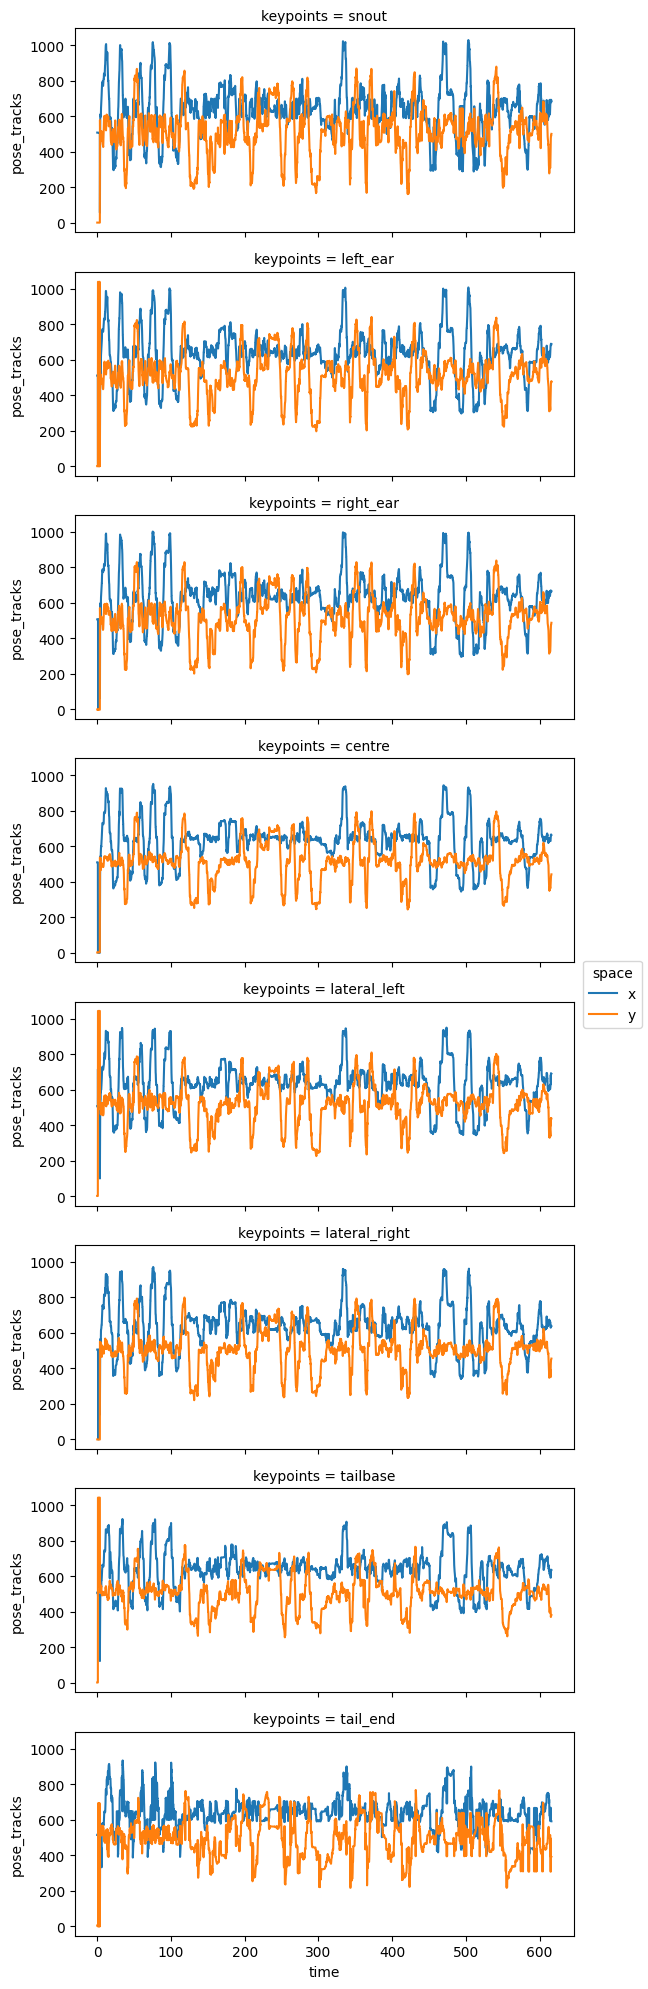

In [80]:
data = ds.pose_tracks.sel(individuals="individual_0")
data.plot.line(x="time", row="keypoints", aspect=2, size=2.5)

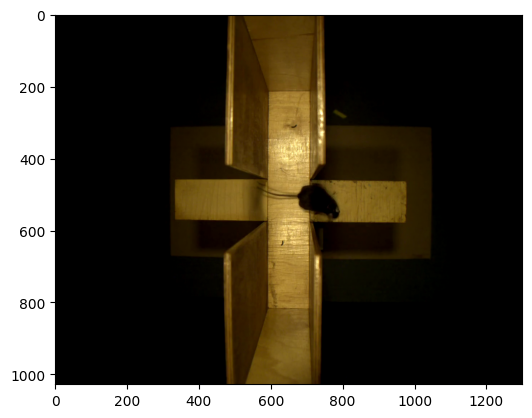

In [47]:
# Import frame
frame1_img = plt.imread(video1_frame_file)
plt.imshow(frame1_img)

In [95]:
def plot_trajectory(
        ds: xr.Dataset,
        individual: str ="individual_0",
        keypoint: str = "tailbase",
        time_range: tuple = None,
        frame: np.ndarray = None,
):
    """Plot trajectory of a single keypoint for a given individual.
    
    Parameters
    ----------
    ds : xr.Dataset
        Dataset containing pose tracks.
    individual : str
        Name of the individual to plot.
    keypoint : str
        Name of the keypoint to plot.
    time_range : tuple
        Start and end time of the trajectory to plot. If None, the entire
        trajectory will be plotted.
    frame : np.ndarray
        Image to use as background. If None, the frame will not be shown.
    """

    fig, ax = plt.subplots(figsize=(7, 7))

    # Show the frame, if provided
    if frame is not None:
        ax.imshow(frame)

    # Select the appropriate data
    data = ds.pose_tracks.sel(individuals=individual, keypoints=keypoint)
    if time_range is not None:
        data = data.sel(time=slice(*time_range))
        
    plt.scatter(
        data.sel(space="x"), data.sel(space="y"), s=2, c=data.time, cmap="viridis"
    )
    plt.title(f"Trajectory of {individual} {keypoint}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(label="time (s)", orientation="horizontal")

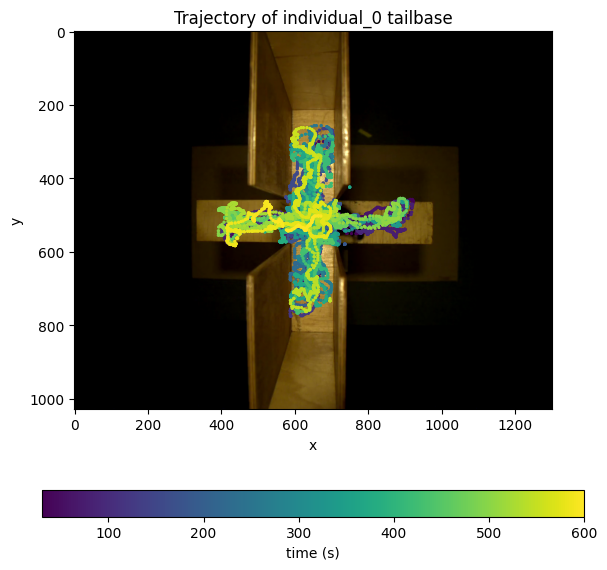

In [97]:
plot_trajectory(
    ds, individual="individual_0",
    keypoint="tailbase",
    frame=frame1_img,
    time_range=(30, 600)
)